In [1]:
library(dplyr)
library(ggplot2)
library(gridExtra)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



# Download source data

In [ ]:
download.file('https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2FNEI_data.zip'
              , 'exdata.zip'
              , method='curl' )
unzip("exdata.zip", files = NULL, exdir=".")

# Load Data

In [5]:
NEI <- readRDS("summarySCC_PM25.rds")

# Explore data set

In [3]:
summary(NEI)
#head(NEI)

     fips               SCC             Pollutant           Emissions       
 Length:6497651     Length:6497651     Length:6497651     Min.   :     0.0  
 Class :character   Class :character   Class :character   1st Qu.:     0.0  
 Mode  :character   Mode  :character   Mode  :character   Median :     0.0  
                                                          Mean   :     3.4  
                                                          3rd Qu.:     0.1  
                                                          Max.   :646952.0  
     type                year     
 Length:6497651     Min.   :1999  
 Class :character   1st Qu.:2002  
 Mode  :character   Median :2005  
                    Mean   :2004  
                    3rd Qu.:2008  
                    Max.   :2008  

# Aggregate data set by year

In [4]:
x <- NEI %>% 
      group_by(year) %>% 
      summarise(sum = sum(Emissions, na.rm = TRUE),
      mean = mean(Emissions, na.rm = TRUE),
      median = median(Emissions, na.rm = TRUE),
      min = min(Emissions, na.rm = TRUE),
      max = max(Emissions, na.rm = TRUE))
y1 <- NEI$Emissions[NEI$year == 1999]
y2 <- NEI$Emissions[NEI$year == 2002]
y3 <- NEI$Emissions[NEI$year == 2005]
y4 <- NEI$Emissions[NEI$year == 2008]

# PM2.5 emissions over years

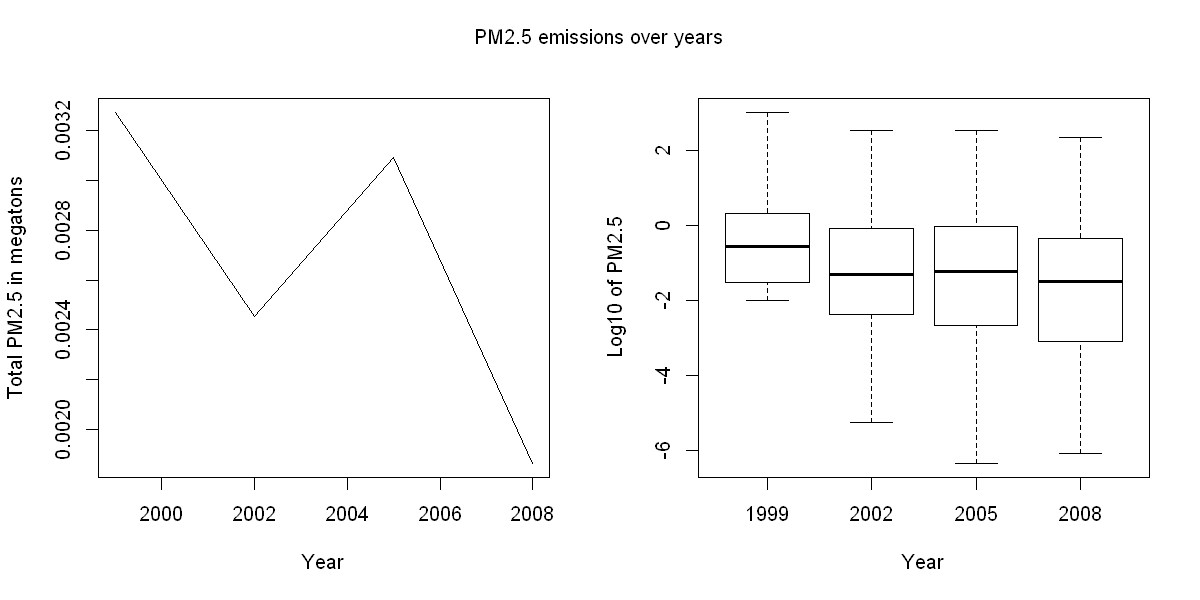

In [17]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
plot(x$year,x$sum/1000000,
      xlab="Year",
      ylab="Total PM2.5 in megatons",
      type="l")
boxplot(log10(y1), log10(y2), log10(y3), log10(y4),
      names=c("1999","2002","2005","2008"),
      xlab="Year",
      ylab="Log10 of PM2.5",
      outline=FALSE)
mtext("PM2.5 emissions over years", side= 3, line=-2, outer = TRUE)

# Aggregate by year (Baltimore)

In [10]:
x <- NEI[NEI$fips == "24510",] %>% 
      group_by(year) %>% 
      summarise(sum = sum(Emissions, na.rm = TRUE),
      mean = mean(Emissions, na.rm = TRUE),
      median = median(Emissions, na.rm = TRUE),
      min = min(Emissions, na.rm = TRUE),
      max = max(Emissions, na.rm = TRUE))
y1 <- NEI$Emissions[NEI$fips == "24510" & NEI$year == 1999]
y2 <- NEI$Emissions[NEI$fips == "24510" & NEI$year == 2002]
y3 <- NEI$Emissions[NEI$fips == "24510" & NEI$year == 2005]
y4 <- NEI$Emissions[NEI$fips == "24510" & NEI$year == 2008]

# PM2.5 emissions over years (Baltimore)

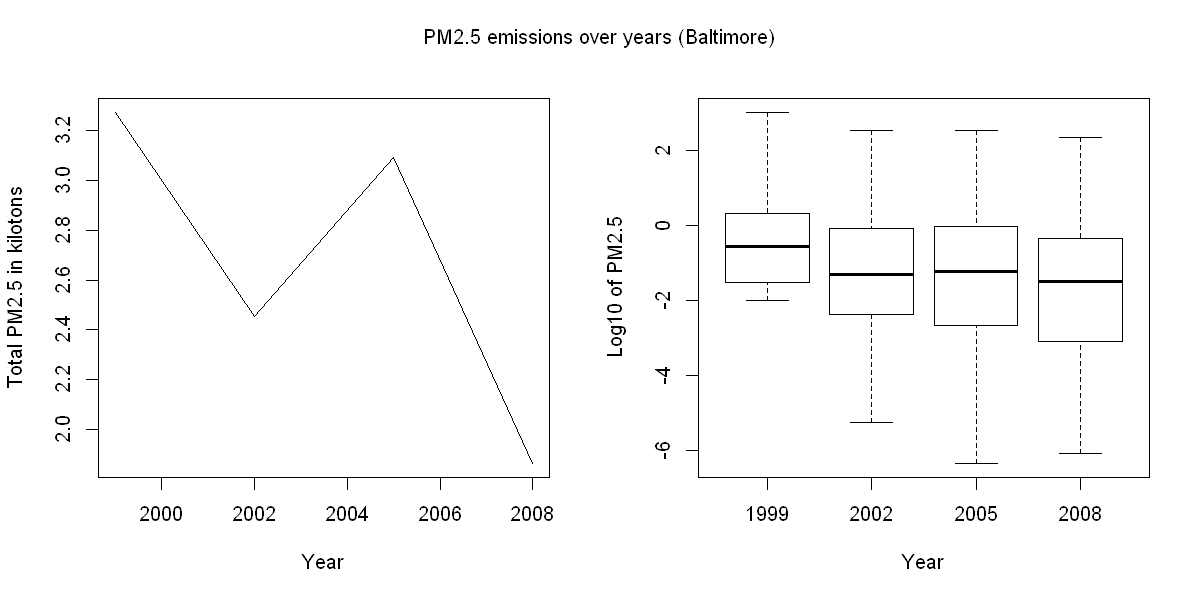

In [18]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
plot(x$year,x$sum/1000,
      xlab="Year",
      ylab="Total PM2.5 in kilotons",
      type="l")
boxplot(log10(y1), log10(y2), log10(y3), log10(y4),
      names=c("1999","2002","2005","2008"),
      xlab="Year",
      ylab="Log10 of PM2.5",
      outline=FALSE)
mtext("PM2.5 emissions over years (Baltimore)", side= 3, line=-2, outer = TRUE)

# Aggregate by year and type (Baltimore)

In [12]:
dfa <- NEI[NEI$fips == "24510", ] %>% 
      group_by(year, type) %>%
      summarise(sum = sum(Emissions, na.rm = TRUE),
      mean = mean(Emissions, na.rm = TRUE),
      median = median(Emissions, na.rm = TRUE),
      min = min(Emissions, na.rm = TRUE),
      max = max(Emissions, na.rm = TRUE),
      .groups = "drop")

# PM2.5 emissions over source types (Baltimore)

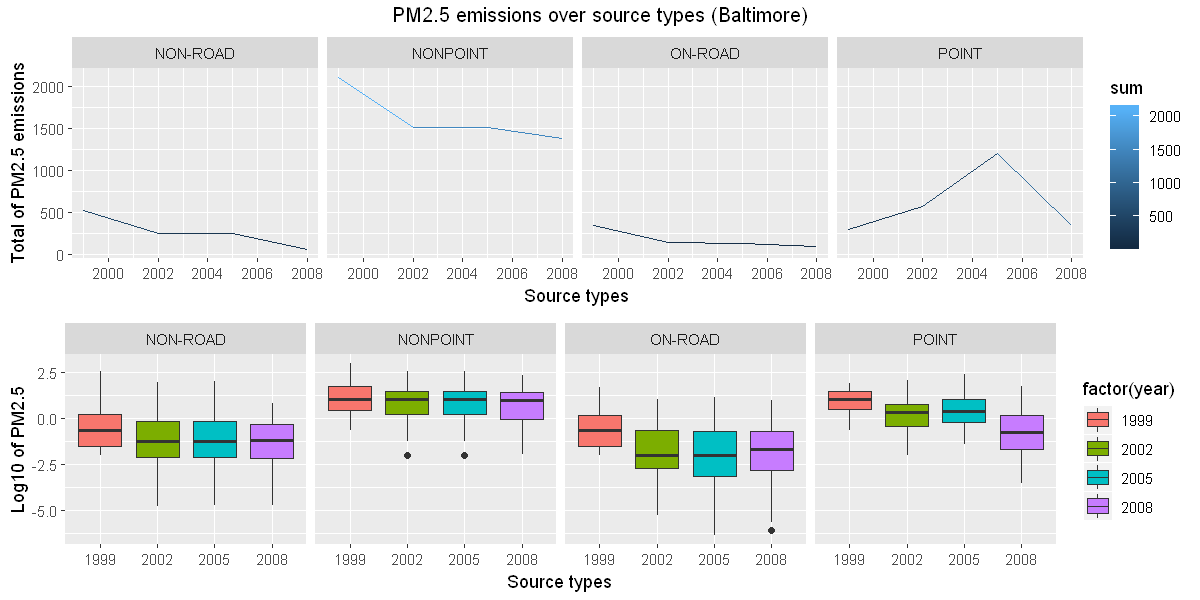

In [21]:
g1 <- ggplot(dfa, aes(x = year, y = sum, color = sum)) +
  geom_line() +
  facet_wrap(~type, nrow = 1, ncol = 4) +
  xlab("Source types") + ylab("Total of PM2.5 emissions")

g2 <- ggplot(NEI[NEI$fips == "24510", ], aes(x = factor(year), y = log10(Emissions), fill = factor(year))) +
  geom_boxplot(na.rm = TRUE) +
  facet_wrap(~type, nrow = 1, ncol = 4) +
  xlab("Source types") + ylab("Log10 of PM2.5")

grid.arrange(g1, g2, nrow = 2, top = "PM2.5 emissions over source types (Baltimore)")